In [1]:
import multiprocessing
# from manage_experiments import find_finished
from multiprocessing import Pool
import pandas as pd
import json as _json

import glob as _glob

from tqdm import tqdm


def find_finished(folder, select_variables):
        """
                finds all tasks that are finished.
                The tasks are assumed to be created with
                create_tasks and computed with
                ranking_correlations.

                folder has form r"res/"
        """
        finished = []
        for filename in tqdm(_glob.glob(folder+"*.results")):
                with open(filename, "r") as file:
                        results = _json.load(file)
                        if results["done"]:
                                criterion = True
                                for var in select_variables:
                                        if not results[var] == select_variables[var]:
                                                criterion = False
                                if criterion:
                                        finished.append(filename)
        return finished


def pandas_df_from_results(fold):
    json_data = []
    finished = find_finished(fold+r"/", {})
    for f in finished:
        with open(f,"r") as file: 
            data = _json.load(file)
        #     data['losses_0'] = None
        #     data['losses_1'] = None
        #     data['losses_2'] = None
            data['fold_truths_0_train'] = None
            data['fold_truths_0_test'] = None
            data['fold_truths_0_val'] = None
            data['fold_truths_1_train'] = None
            data['fold_truths_1_test'] = None
            data['fold_truths_1_val'] = None
            data['fold_truths_2_train'] = None
            data['fold_truths_2_test'] = None
            data['fold_truths_2_val'] = None
            data['fold_preds_0_train'] = None
            data['fold_preds_0_test'] = None
            data['fold_preds_0_val'] = None
            data['fold_preds_1_train'] = None
            data['fold_preds_1_test'] = None
            data['fold_preds_1_val'] = None
            data['fold_preds_2_train'] = None
            data['fold_preds_2_test'] = None
            data['fold_preds_2_val'] = None
            df_norm = pd.json_normalize(data)
            json_data.append(df_norm)
    return pd.concat(json_data, ignore_index = True)


def f(fold):
    df = pandas_df_from_results(fold)
    df.to_csv(fold+".csv",index=False)

In [2]:
if __name__ == '__main__':
    results_folders = [
        "results"
        ]
    for fold in results_folders:
        print(fold)
        f(fold)
    # with Pool(1) as p:
        # print(p.map(f,results_folders))

results


100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


In [3]:
import pandas as pd
df = pd.read_csv('results.csv')

# df1 = pd.read_csv('res_Embeddings_1.csv')
# df2 = pd.read_csv('res_Embeddings_2.csv')

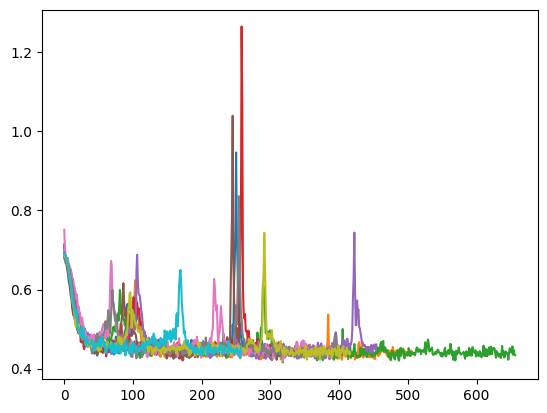

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.plot(eval(df[[f'losses_{i}']].iloc[0,0]))
plt.show()

In [6]:
df['Balanced_Accuracy'] = (sum([df[f'Balanced Accuracy_{i}_test'] for i in range(10)]))/10
df['Balanced_Accuracy']

0    0.717304
1    0.707704
Name: Balanced_Accuracy, dtype: float64